In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
filepath = "20-11-58.csv"
filepath = "20-27-48.csv"
df = pd.read_csv(filepath, header=None, usecols=[0, 1])

df.columns = ["distance", "flashing"]

In [3]:
# Get start/stop indices
start_indices = df["flashing"][df["flashing"] == 'Start'].index
stop_indices = df["flashing"][df["flashing"] == 'Stop'].index

# Get flashing indices
flashing_on_indices = df["flashing"][df["flashing"] == 'Flashing On'].index
flashing_off_indices = df["flashing"][df["flashing"] == 'Flashing Off'].index

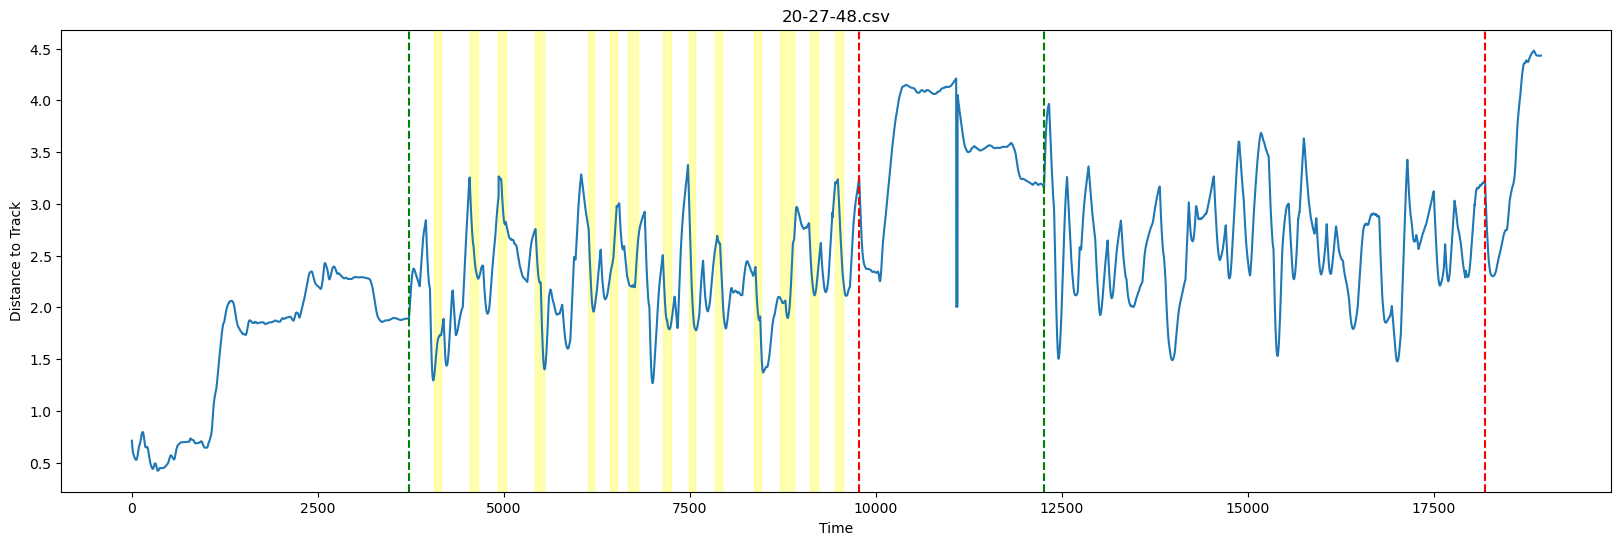

In [4]:
plt.figure(figsize=(20,6))
plt.plot(df["distance"], label='Distance')

plt.title(filepath)
plt.xlabel('Time')
plt.ylabel('Distance to Track')

# Plot start/stop
for start_idx in start_indices:
    plt.axvline(x=start_idx, color='green', linestyle='--', label='Start')
for stop_idx in stop_indices:
    plt.axvline(x=stop_idx, color='red', linestyle='--', label='Stop')

# Highlight flashing periods
for start, end in zip(flashing_on_indices, flashing_off_indices):
    plt.axvspan(start, end, color='yellow', alpha=0.3, label='Flashing On')

plt.show()

In [5]:
# Get statistics for flashing/non-flashing segments

# Get flashing indices
df["flashing"] = df["flashing"].replace("Start", np.nan)
df["flashing"] = df["flashing"].replace("Stop", np.nan)
df["flashing"] = df["flashing"].ffill()
df["flashing"] = df["flashing"].replace(np.nan, "Flashing Off")

i = 0
for start, stop in zip(start_indices, stop_indices):
    segment = df.loc[start:stop]
    no_flashing_segment = segment[segment["flashing"] == 'Flashing Off']
    yes_flashing_segment = segment[segment["flashing"] == 'Flashing On']
    
    no_flashing_mean = no_flashing_segment['distance'].mean()
    no_flashing_std = no_flashing_segment['distance'].std()

    yes_flashing_mean = yes_flashing_segment['distance'].mean()
    yes_flashing_std = yes_flashing_segment['distance'].std()

    print(f"Trial {i}\nNo Flashing:\n\tMean: {no_flashing_mean}\n\tSTD: {no_flashing_std}\nFlashing:\n\tMean: {yes_flashing_mean}\n\tSTD: {yes_flashing_std}\n")

    i += 1

No Flashing:
Mean: 2.281253967863475
STD: 0.44454327290863677
Flashing:
Mean: 2.3220023980519477
STD: 0.42975553733380667

No Flashing:
Mean: 2.599707076248313
STD: 0.49390491345921667
Flashing:
Mean: nan
STD: nan

